# Geodatenverarbeitung mit OpenSource Komponenten 2024

Kurs ETH Zürich - Planung 2025

Hans-Jörg Stark

Hilfreiche Referenz: <a href='https://pcjericks.github.io/py-gdalogr-cookbook/layers.html'>https://pcjericks.github.io/py-gdalogr-cookbook/layers.html</href>

In [1]:
import os
from osgeo import ogr
import sys

### Tag 1

In [8]:
# Initiieren des korrekten Treibers und Laden der Geodaten

drv = ogr.GetDriverByName("Esri Shapefile")
path2ds = os.path.join("Data","Gemeinden_Solothurn.shp")
print(path2ds)

datasource = drv.Open(path2ds)
print(datasource)


Data/Gemeinden_Solothurn.shp
<osgeo.ogr.DataSource; proxy of <Swig Object of type 'OGRDataSourceShadow *' at 0x11ea82630> >


In [9]:
# Definition des Layers der geladenen Shapedatei

layer = datasource.GetLayer(0)
print(layer)

<osgeo.ogr.Layer; proxy of <Swig Object of type 'OGRLayerShadow *' at 0x11ea7e720> >


In [10]:
# Ermittlung der Anzahl Datensätze im Layer

ftrCnt = layer.GetFeatureCount()
print(f"Die Anzahl der Gemeinden im Kanton Solothurn beträgt {ftrCnt}.")
      

Die Anzahl der Gemeinden im Kanton Solothurn beträgt 109.


In [13]:
# Shape in GeoJSON umwandeln
gjsonFl = os.path.join("Data","gemSo.geojson")
cmd = f'ogr2ogr -f GeoJSON {gjsonFl} {path2ds}'
print(cmd)

os.system(cmd)

ogr2ogr -f GeoJSON Data/gemSo.geojson Data/Gemeinden_Solothurn.shp


0

In [14]:
# dasselbe mit GeoJSON Daten

drv = ogr.GetDriverByName("GeoJSON")
#path2ds = os.path.join("Data","gemSo.geojson")
datasource = drv.Open(gjsonFl)
layer = datasource.GetLayer(0)
ftrCnt = layer.GetFeatureCount()
print(f"Die Anzahl der Gemeinden im Kanton Solothurn beträgt {ftrCnt}.")


Die Anzahl der Gemeinden im Kanton Solothurn beträgt 109.


In [15]:
# Zugriff auf Attributinformationen

lyrDef = layer.GetLayerDefn()
fldCnt = lyrDef.GetFieldCount()
print(f"Die Anzahl der Attribute im Geodatensatz beträgt {fldCnt}.")


Die Anzahl der Attribute im Geodatensatz beträgt 11.


In [16]:
for i in range(fldCnt):
    attName = lyrDef.GetFieldDefn(i).GetName()
    print(f"{i+1}. Attribut heisst {attName}")

1. Attribut heisst name
2. Attribut heisst gem_bfs
3. Attribut heisst gmde_name
4. Attribut heisst gmde_nr
5. Attribut heisst bzrk_nr
6. Attribut heisst eg_nr
7. Attribut heisst plz
8. Attribut heisst ktn_nr
9. Attribut heisst new_date
10. Attribut heisst archive_da
11. Attribut heisst archive


In [17]:
# SRS Extraktion

mySrs = layer.GetSpatialRef()
print(mySrs)

PROJCS["CH1903 / LV03",
    GEOGCS["CH1903",
        DATUM["CH1903",
            SPHEROID["Bessel 1841",6377397.155,299.1528128,
                AUTHORITY["EPSG","7004"]],
            AUTHORITY["EPSG","6149"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4149"]],
    PROJECTION["Hotine_Oblique_Mercator_Azimuth_Center"],
    PARAMETER["latitude_of_center",46.9524055555556],
    PARAMETER["longitude_of_center",7.43958333333333],
    PARAMETER["azimuth",90],
    PARAMETER["rectified_grid_angle",90],
    PARAMETER["scale_factor",1],
    PARAMETER["false_easting",600000],
    PARAMETER["false_northing",200000],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","21781"]]


In [18]:
# Ausdehnung der Geometien, dh MBR ermitteln

myExtent = layer.GetExtent()


In [19]:
print(f"Dies sind die 4 Eckpunkte des MBR: \n 1. Punkt: {myExtent[0]} / {myExtent[2]} \n 2. Punkt: {myExtent[0]} / {myExtent[3]} \n 3. Punkt: {myExtent[1]} / {myExtent[3]} \n 4. Punkt: {myExtent[1]} / {myExtent[2]}")

Dies sind die 4 Eckpunkte des MBR: 
 1. Punkt: 592560.389 / 213702.99 
 2. Punkt: 592560.389 / 261329.631 
 3. Punkt: 644759.038 / 261329.631 
 4. Punkt: 644759.038 / 213702.99


In [20]:
#Geometrietyp der Ebene

geomRefNm = ogr.GeometryTypeToName(lyrDef.GetGeomType())
print(f"Der Geometrietyp der Ebene ist: {geomRefNm}")

Der Geometrietyp der Ebene ist: Unknown (any)


In [21]:
# Zugriff auf einzelne Features/Objekte/Datensätze

myFtr = layer.GetFeature(0)
print(myFtr)

<osgeo.ogr.Feature; proxy of <Swig Object of type 'OGRFeatureShadow *' at 0x11dd62030> >


In [28]:
layer.SetAttributeFilter("")
ftr2search = input("Gemeindename:")
for feature in layer:
    if feature.GetField("name") == ftr2search:
        print(f"BFS Nummer für {ftr2search} lautet: {feature.GetField('gem_bfs')}")



Gemeindename:Olten
BFS Nummer für Olten lautet: 2581


In [24]:
layer.SetAttributeFilter(f"name = '{ftr2search}'")
for feature in layer:
    print(feature.GetField('gem_bfs'))
myftr = layer         

2581


In [25]:
layer.SetAttributeFilter("name = 'Solothurn'")
print(feature.GetField('gem_bfs'))

2581


In [30]:
for feature in layer:
    print(feature.GetField('gem_bfs'))
    #print(feature.GetGeometryRef())

2498
2571
2614
2401
2585
2497
2428
2532
2553
2555
2611
2612
2620
2622
2518
2574
2547
2500
2427
2580
2578
2429
2492
2426
2481
2530
2463
2526
2616
2581
2407
2477
2514
2476
2528
2541
2579
2422
2543
2529
2572
2525
2576
2502
2573
2479
2615
2546
2493
2583
2516
2527
2424
2406
2549
2495
2402
2474
2517
2519
2499
2551
2544
2408
2524
2534
2513
2601
2455
2471
2520
2584
2545
2503
2456
2457
2472
2478
2511
2535
2464
2548
2445
2556
2423
2491
2617
2473
2550
2425
2403
2575
2404
2586
2405
2523
2421
2501
2619
2542
2582
2461
2475
2613
2554
2480
2618
2621
2465


In [31]:
def analyzeGeometry(geometry, indent=0):
    s = []
    s.append("  " * indent)
    s.append(geometry.GetGeometryName())
    if geometry.GetPointCount() > 0:
        s.append(" mit %d Stuetzpunkten" % geometry.GetPointCount())
    if geometry.GetGeometryCount() > 0:
        s.append(" enthaelt:")

    print ("".join(s))

    for i in range(geometry.GetGeometryCount()):
        print(i)
        analyzeGeometry(geometry.GetGeometryRef(i), indent+1)

In [32]:
# Geometrie eines Features:
curFtr = layer.GetFeature(16)
print(curFtr.GetField('name'))
myGeometry = curFtr.GetGeometryRef()
#print(myGeometry)

Günsberg


In [33]:
analyzeGeometry(myGeometry)

POLYGON enthaelt:
0
  LINEARRING mit 377 Stuetzpunkten


### Tag 2

In [34]:
# Hausaufgaben:
ftrDict = {}
for feature in layer:
    geometry = feature.GetGeometryRef()
    geomCnt = geometry.GetGeometryCount()
    for i in range(geomCnt): 
        if geometry.GetGeometryRef(i).GetPointCount() > 0:
            pntCnt = geometry.GetGeometryRef(i).GetPointCount()
            ftrDict[feature.GetField('gmde_name')] = pntCnt
sortedFtrDict = sorted(ftrDict.items(), key=lambda x:x[1])

if len(ftrDict) >0:
    avgPntCnt = int(sum(ftrDict.values()) / len(ftrDict))
    print(f"Die Gemeinde in Solothurn mit:\n   den wenigsten Stützpunkten:{sortedFtrDict[0]}\n   den meisten Stützpunkten:{sortedFtrDict[-1]}\n(Durchschnittliche Anzahl Stützpunkte pro Gemeinde: {avgPntCnt})")

Die Gemeinde in Solothurn mit:
   den wenigsten Stützpunkten:('Rodersdorf', 112)
   den meisten Stützpunkten:('Erlinsbach SO', 1407)
(Durchschnittliche Anzahl Stützpunkte pro Gemeinde: 440)


In [35]:
# Umprojektion von Geodaten

from osgeo import osr
source = osr.SpatialReference()
source.ImportFromEPSG(2056)
destination = osr.SpatialReference()
destination.ImportFromEPSG(4326)

transformationdef = osr.CoordinateTransformation(source, destination)
retransformationdef = osr.CoordinateTransformation(destination,source)

point = ogr.CreateGeometryFromWkt("POINT (2618579 1244235)")
point2 = ogr.CreateGeometryFromWkt("POINT (2618579 1244235)")
print(f"Ausgangspunkt LV95: {point.ExportToWkt()}")
point.Transform(transformationdef)
point2.Transform(transformationdef)
point2.Transform(retransformationdef)

pointWGS84 = ogr.CreateGeometryFromWkt(point.ExportToWkt())
print(f"Transformierter Punkt in WGS84: {pointWGS84.ExportToWkt()}")
print(f"Rücktransformierter Punkt in LV95: {point2.ExportToWkt()}")

x=str(point.ExportToWkt()).split('(')[1].split(' ')[0]
y=str(point.ExportToWkt()).split('(')[1].split(' ')[1].split(')')[0]
print(x,y)

    

Ausgangspunkt LV95: POINT (2618579 1244235)
Transformierter Punkt in WGS84: POINT (47.3487071641269 7.68450280319522)
Rücktransformierter Punkt in LV95: POINT (2618579.00056614 1244235.00115685)
47.3487071641269 7.68450280319522


In [36]:
# Extraktion aller Zentroide der Gemeinden
centroidFl = os.path.join('Data','centroidsGemSo.csv')
with open(centroidFl, 'w', encoding='utf-8') as centroidFl:
    centroidFl.write("GemName,X,Y\n")
    for feature in layer:
        geometry = feature.GetGeometryRef()
        minEasting,maxEasting,minNorthing,maxNorthing = geometry.GetEnvelope()
        centerX = (minEasting + maxEasting)/2
        centerY = (minNorthing + maxNorthing)/2
        gemName = feature.GetField('gmde_name')
        ftrInfo = f"{gemName},{centerX},{centerY}\n"
        centroidFl.write(ftrInfo)
        

In [37]:
# Lösung Lukas

import csv
dict = [['Gemeinde', 'Centroid']]
for feature in layer:
    name = feature.GetField("name")
    polygon = feature.GetGeometryRef()
    centroid = polygon.Centroid()
    dict.append([name, centroid])
    
with open('solothurn_center.csv', 'w', newline='', encoding='utf-8') as csvfile:
    
    csvwriter = csv.writer(csvfile)
    csvwriter.writerows(dict)

with open('solothurn_center.csv', 'r', encoding='utf-8') as csvfile:
    for row in csvfile:
        print(row)

Gemeinde,Centroid

Rohr,POINT (638811.067723848 251323.78765764)

Boningen,POINT (631433.595773726 239262.035954597)

Büsserach,POINT (608007.64649093 248773.663224415)

Egerkingen,POINT (627043.811838396 241736.272661099)

Walterswil,POINT (639960.470487599 242144.311875436)

Obergösgen,POINT (638934.329313055 246052.650570903)

Mümliswil-Ramiswil,POINT (618003.971930186 244294.456525332)

Subingen,POINT (614034.28281 227700.799157357)

Oberdorf,POINT (604131.310525347 232134.918698141)

Rüttenen,POINT (607177.455185779 232189.058574687)

Bärschwil,POINT (602041.400873615 248245.881417738)

Beinwil,POINT (611593.992994595 245057.236566273)

Meltingen,POINT (611348.131941383 247620.039666757)

Zullwil,POINT (612451.775428482 248585.288451597)

Etziken,POINT (615701.217512814 226350.139124971)

Eppenberg-Wöschnau,POINT (644248.80371216 247849.348360601)

Günsberg,POINT (610269.365628435 234682.372325948)

Trimbach,POINT (634056.114021128 246641.457210408)

Matzendorf,POINT (614247.56681

### Rasterdaten

In [38]:
from osgeo import gdal
rb = os.path.join('Data','ortho14_5m_rgb_solothurn.tif')

def getDifferentRasterInformatioN(rasFl):
    ds = gdal.Open(rasFl)
    cols = ds.RasterXSize
    rows = ds.RasterYSize
    bands = ds.RasterCount
    
    print(f"Anzahl Spalten: {cols}, Anzahl Zeilen: {rows}, Anzahl Bänder: {bands}")
    
    addInfo = ds.GetGeoTransform()
    orig = f"Ursprung: {addInfo[0]},{addInfo[3]}"
    pxsize = f"Pixelgrösse: x = {addInfo[1]}, y = {addInfo[5]}"
    rot = f"Rotation: Achse 1 = {addInfo[2]}, y = {addInfo[4]}"
    print(f"{orig}\n{pxsize}\n{rot}\n")

    #Bandinformationen
    for bandnr in range(bands):
        band = ds.GetRasterBand(bandnr+1)
        print ('Band-Typ: ',gdal.GetDataTypeName(band.DataType))
        
        if not band is None:
            min = band.GetMinimum()
            max = band.GetMaximum()
            ct = band.GetColorTable()
            if not ct is None:
                print ('Band hat ', ct, ' Farbpalette.')
        
        if min is None or max is None:
            (min,max) = band.ComputeRasterMinMax(1)
        
        print ('Min=%.3f, Max=%.3f' % (min,max))
        
        if band.GetOverviewCount() > 0:
            print ('Band hat ', band.GetOverviewCount(), ' Übersichten.')
        
        if not band.GetRasterColorTable() is None:
            print ('Band hat eine Farbtabelle mit ', \
            band.GetRasterColorTable().GetCount(), ' Einträgen.')  

getDifferentRasterInformatioN(rb)

Anzahl Spalten: 5800, Anzahl Zeilen: 4800, Anzahl Bänder: 3
Ursprung: 592000.0,237000.0
Pixelgrösse: x = 5.0, y = -5.0
Rotation: Achse 1 = 0.0, y = 0.0

Band-Typ:  Byte
Min=0.000, Max=189.000
Band hat  7  Übersichten.
Band-Typ:  Byte
Min=0.000, Max=182.000
Band hat  7  Übersichten.
Band-Typ:  Byte
Min=0.000, Max=172.000
Band hat  7  Übersichten.


In [40]:
scndPic = os.path.join('Data','myimg.png')
getDifferentRasterInformatioN(scndPic)

Anzahl Spalten: 1244, Anzahl Zeilen: 962, Anzahl Bänder: 4
Ursprung: 0.0,0.0
Pixelgrösse: x = 1.0, y = 1.0
Rotation: Achse 1 = 0.0, y = 0.0

Band-Typ:  Byte
Min=23.000, Max=255.000
Band-Typ:  Byte
Min=20.000, Max=255.000
Band-Typ:  Byte
Min=12.000, Max=255.000
Band-Typ:  Byte
Min=255.000, Max=255.000


In [27]:
thrdPic = r"\\fs.bauwelt.ethz.ch\baug-bauwelt-home$\starkhan\Downloads\lubis-luftbilder_farbe_000-288-671_op_2056.tif"
getDifferentRasterInformatioN(thrdPic)

ds = r'Data/swissalti3d.tif'
getDifferentRasterInformatioN(ds)

Anzahl Spalten: 15793, Anzahl Zeilen: 15701, Anzahl Bänder: 3
Ursprung: 2598337.5,1200922.5
Pixelgrösse: x = 0.5, y = -0.5
Rotation: Achse 1 = 0.0, y = 0.0

Band-Typ:  Byte
Min=0.000, Max=234.000
Band hat  6  Übersichten.
Band-Typ:  Byte
Min=0.000, Max=240.000
Band hat  6  Übersichten.
Band-Typ:  Byte
Min=0.000, Max=232.000
Band hat  6  Übersichten.
Anzahl Spalten: 2000, Anzahl Zeilen: 2000, Anzahl Bänder: 1
Ursprung: 2601000.0,1202000.0
Pixelgrösse: x = 0.5, y = -0.5
Rotation: Achse 1 = 0.0, y = 0.0

Band-Typ:  Float32
Min=515.212, Max=559.813
Band hat  3  Übersichten.


In [41]:
# obtained from http://www.gis.usu.edu/~chrisg/python/2009/lectures/ospy_slides4.pdf and adapted
# script to get pixel values at a set of coordinate by reading in one pixel at a time

import os, sys, numpy, time, csv
from osgeo import gdal
from osgeo.gdalconst import *

# start timing
startTime = time.time()
# coordinates to get pixel values for
#xValues = [594000.0, 604000.0, 613500.0,599594.0]
#yValues = [229500.0, 231000.0, 222800.0,226081.0]

centrPnts = os.path.join("Data","centroidsGemSo.csv")
with open(centrPnts, 'r', encoding='utf-8') as centroidFl:
    cpwri = os.path.join('Data','centroidsGemSoWithRasterInformation.csv')
    with open(cpwri, 'w', encoding='utf-8') as cpwriFl:
        
        # register all of the drivers
        gdal.AllRegister()
        # open the image
        ds = gdal.Open('Data/ortho14_5m_rgb_solothurn.tif', GA_ReadOnly)
        if ds is None:
            print ('Could not open image')
            sys.exit()
        
        # get image size
        rows = ds.RasterYSize
        cols = ds.RasterXSize
        bands = ds.RasterCount
        # get georeference info
        transform = ds.GetGeoTransform()
        xOrigin = transform[0]
        yOrigin = transform[3]
        pixelWidth = transform[1]
        pixelHeight = transform[5]
        outStr = 'X , Y , xOffset , yOffset , Wert Band 1 , Wert Band 2 , Wert Band 3 \n'
        #print(outStr)
        cpwriFl.write(outStr)
    
        output=False
        cnt = 0
        lineCnt = 0
    
        # loop through the coordinates
        for lines in centroidFl:   
            # get x,y
            if lineCnt > 0:
                x = float(lines.split(",")[1])
                y = float(lines.split(",")[2])
                # compute pixel offset
                xOffset = int((x - xOrigin) / pixelWidth)
                yOffset = int((y - yOrigin) / pixelHeight)
    
                # create a string to print out
                s = str(x) + ', ' + str(y) + ', ' + str(xOffset) + ', ' + str(yOffset) + ', '
                # loop through the bands
                for j in range(bands):
                    band = ds.GetRasterBand(j+1) # 1-based index
                    #read data and add the value to the string
                    data = band.ReadAsArray(xOffset, yOffset, 1, 1)
                    try:
                        value = data[0,0]
                        #print(data)
                        #value2 = numpy.median(data)
                        s = s + str(value) + ', '
                        output=True
                    except:
                        output=False
                        pass
                
                #print out the data string
                if output:
                    print(s)
                    cpwriFl.write(f"{s[:-1]}\n")
                    cnt += 1
            lineCnt += 1
# figure out how long the script took to run
endTime = time.time()
print()
print ('The script took %.3f seconds' %(endTime - startTime))
print(f"{cnt} Punkte innerhalb des Rasterbildes von {lineCnt}")

614157.919, 227592.20500000002, 4431, 1881, 69, 92, 78, 
603837.217, 232008.2035, 2367, 998, 61, 63, 69, 
607279.375, 232042.40364837286, 3055, 991, 63, 88, 71, 
615644.5155, 226142.72999999998, 4728, 2171, 167, 162, 150, 
610056.551, 234662.75400000002, 3611, 467, 201, 163, 149, 
606360.3695, 235851.001, 2872, 229, 111, 122, 105, 
612544.7455, 223336.429, 4108, 2732, 72, 94, 85, 
603189.7409999999, 218655.7115, 2237, 3668, 137, 148, 163, 
606760.286, 224852.19199999998, 2952, 2429, 83, 79, 78, 
616792.931, 226934.4895, 4958, 2013, 110, 115, 101, 
610964.84, 223321.053, 3792, 2735, 178, 171, 164, 
607948.3489999999, 234330.3205, 3189, 533, 91, 104, 84, 
598558.324, 228315.2745, 1311, 1736, 57, 79, 67, 
613621.3470000001, 225518.5635, 4324, 2296, 98, 93, 92, 
611828.5774999999, 224931.9575, 3965, 2413, 66, 89, 78, 
596021.1945, 227677.90000000002, 804, 1864, 37, 49, 56, 
613586.88, 229625.0325, 4317, 1474, 115, 114, 104, 
611280.4985, 229238.60499999998, 3856, 1552, 76, 81, 77, 
611624.

ERROR 5: Data/ortho14_5m_rgb_solothurn.tif, band 1: Access window out of range in RasterIO().  Requested
(9351,-2853) of size 1x1 on raster of 5800x4800.
ERROR 5: Data/ortho14_5m_rgb_solothurn.tif, band 2: Access window out of range in RasterIO().  Requested
(9351,-2853) of size 1x1 on raster of 5800x4800.
ERROR 5: Data/ortho14_5m_rgb_solothurn.tif, band 3: Access window out of range in RasterIO().  Requested
(9351,-2853) of size 1x1 on raster of 5800x4800.
ERROR 5: Data/ortho14_5m_rgb_solothurn.tif, band 1: Access window out of range in RasterIO().  Requested
(7983,-398) of size 1x1 on raster of 5800x4800.
ERROR 5: Data/ortho14_5m_rgb_solothurn.tif, band 2: Access window out of range in RasterIO().  Requested
(7983,-398) of size 1x1 on raster of 5800x4800.
ERROR 5: Data/ortho14_5m_rgb_solothurn.tif, band 3: Access window out of range in RasterIO().  Requested
(7983,-398) of size 1x1 on raster of 5800x4800.
ERROR 5: Data/ortho14_5m_rgb_solothurn.tif, band 1: Access window out of range 

#### Höhenmodellinformationen ableiten

In [43]:
cmd = 'gdal_contour -a hoehe -i 150 Data/Elevation_raster.tif Data/contour150.shp'
os.system(cmd)

0...10...20...30...40...50...60...70...80...90...100 - done.


0

In [44]:
cmdList = []
cmdList.append('gdaldem slope Data/Elevation_raster.tif Data/Ele_slope.tif -p')
cmdList.append('gdaldem aspect Data/Elevation_raster.tif Data/Ele_aspect.tif')
cmdList.append('gdaldem hillshade Data/Elevation_raster.tif Data/Ele_hillshade.tif')
for cmd in cmdList:
    os.system(cmd)

0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.


In [45]:
import os, sys
from osgeo import gdal
from osgeo.gdalconst import *

# register all of the drivers
gdal.AllRegister()

#Open Rasterfile
fn = 'Data/worldmap.jpg'
ds = gdal.Open(fn)
if ds is None:
    print ('Datensatz %s konnte nicht geöffnet werden' %fn)
    sys.exit(1)

os.system('gdalinfo %s' %fn) 
translatecommand = 'gdal_translate -projwin 1680 170 2200 550 %s Data/europe.tif' %fn
print ("command to run: %s" %translatecommand )
os.system(translatecommand)

#kleinere Kopie von Europa
translatecommand = 'gdal_translate -projwin 1680 170 2200 550 -outsize 50%% 50%% %s Data/europesmall.tif' %fn
print ("command to run: %s" %translatecommand) 
os.system(translatecommand)



Driver: JPEG/JPEG JFIF
Files: Data/worldmap.jpg
Size is 3600, 1800
Image Structure Metadata:
  COMPRESSION=JPEG
  INTERLEAVE=PIXEL
  SOURCE_COLOR_SPACE=YCbCr
Corner Coordinates:
Upper Left  (    0.0,    0.0)
Lower Left  (    0.0, 1800.0)
Upper Right ( 3600.0,    0.0)
Lower Right ( 3600.0, 1800.0)
Center      ( 1800.0,  900.0)
Band 1 Block=3600x1 Type=Byte, ColorInterp=Red
  Overviews: 1800x900, 900x450, 450x225
  Image Structure Metadata:
    COMPRESSION=JPEG
Band 2 Block=3600x1 Type=Byte, ColorInterp=Green
  Overviews: 1800x900, 900x450, 450x225
  Image Structure Metadata:
    COMPRESSION=JPEG
Band 3 Block=3600x1 Type=Byte, ColorInterp=Blue
  Overviews: 1800x900, 900x450, 450x225
  Image Structure Metadata:
    COMPRESSION=JPEG
command to run: gdal_translate -projwin 1680 170 2200 550 Data/worldmap.jpg Data/europe.tif
Input file size is 3600, 1800
0...10...20...30...40...50...60...70...80...90...100 - done.
command to run: gdal_translate -projwin 1680 170 2200 550 -outsize 50% 50% Dat

0

### Geodaten schreiben

In [47]:
from osgeo import ogr
from osgeo import osr

# Räumliche Referenzsystem setzen
srs = osr.SpatialReference()
#srs.SetWellKnownGeogCS('WGS84')
#srs.SetFromUserInput("EPGS:4326")
srs.ImportFromEPSG(4326)

# Alternative: srs aus existierendem Layer verwenden
#srs.ImportFromProj4(layer.GetSpatialRef().ExportToProj4())

# Datei erstellen vom Typ Esri Shapefile
driver = ogr.GetDriverByName("ESRI Shapefile")
destFlNm = os.path.join("Data","myFirstLyr.shp")

#GeoJSON
driver = ogr.GetDriverByName("GeoJSON")
destFlNm = os.path.join("Data","myFirstLyr.geojson")

#GeoPackage
driver = ogr.GetDriverByName("GPKG")
destFlNm = os.path.join("Data","myFirstLyr.gpkg")


if os.path.exists(destFlNm):
    driver.DeleteDataSource(destFlNm)
destinationFile = driver.CreateDataSource(destFlNm)
destinationLyr = destinationFile.CreateLayer("lyr",srs)

# GeoPackage Test
#destinationFile2 = driver.Open(destFlNm)
destinationLyr2 = destinationFile.CreateLayer("lyr2",srs)

# Attributdefinition: 3 Attribute: name (String), bemerkung (String), wert (Integer)
fieldDef = ogr.FieldDefn('name',ogr.OFTString)
fieldDef.SetWidth(50)
destinationLyr.CreateField(fieldDef)
fieldDef = ogr.FieldDefn('bemerkung',ogr.OFTString)
fieldDef.SetWidth(150)
destinationLyr.CreateField(fieldDef)
fieldDef = ogr.FieldDefn('wert',ogr.OFTInteger)
destinationLyr.CreateField(fieldDef)
destinationLyr2.CreateField(fieldDef)

fieldDef = ogr.FieldDefn('flaeche',ogr.OFTReal)
destinationLyr.CreateField(fieldDef)


# Featuredefinition - Erstellung eines Eintrags in die erstellte Layerstruktur
ftrName = 'square'
minEasting = 7.5
maxEasting = 7.6
minNorthing = 46.5
maxNorthing = 46.6

# Linearer Ring erstellen
lR = ogr.Geometry(ogr.wkbLinearRing)

# Stützpunkte definieren
lR.AddPoint(minEasting, minNorthing)
lR.AddPoint(maxEasting, minNorthing)
lR.AddPoint(maxEasting, maxNorthing)
lR.AddPoint(minEasting, maxNorthing)
lR.AddPoint(minEasting, minNorthing)

# Instanzierung der Geometrie als WkbPolygon
sqr = ogr.Geometry(ogr.wkbPolygon)

# Zuweisen der Geometrie
sqr.AddGeometry(lR)
ftrarea = abs(sqr.GetArea())


# Feature mit Attribut- und Geometriedefinition
sqrFtr = ogr.Feature(destinationLyr.GetLayerDefn())
sqrFtr.SetGeometry(sqr)
sqrFtr.SetField("name",ftrName)
sqrFtr.SetField("bemerkung","Hurra, ich bin ein quadrat!")
sqrFtr.SetField("wert",9)
sqrFtr.SetField("flaeche",ftrarea)
# Feature dem Layer hinzufügen
destinationLyr.CreateFeature(sqrFtr)
#destinationLyr2.CreateFeature(sqrFtr)

# Freigabe des Featureobjekts und der Datei
sqrFtr.Destroy()
destinationFile.Destroy()

### Tag 3

#### Rasterdaten schreiben

(600000.0, 10.0, 0.0, 200000.0, 0.0, -10.0)


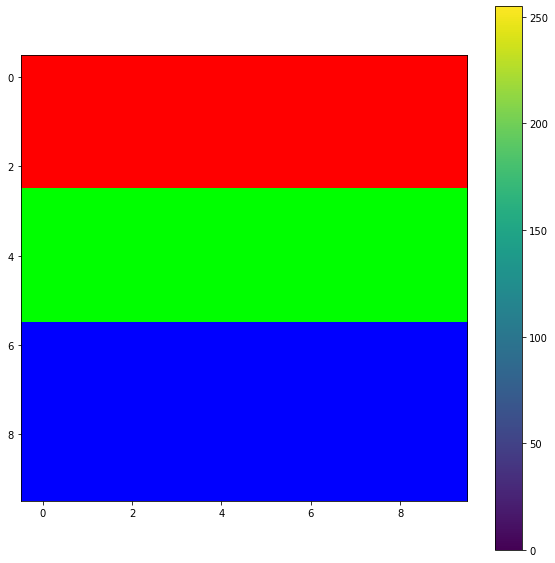

In [48]:
from osgeo import gdal
from osgeo import osr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.image as mpimg
cmap = mpl.colormaps['viridis']

fn_create = "Data/gdalCreateRaster3.tif"  # filename for new raster
driver_gtiff = gdal.GetDriverByName('GTiff')
ds_create = driver_gtiff.Create(fn_create, xsize=10, ysize=10, bands=3, eType=gdal.GDT_Byte)

srs = osr.SpatialReference()
srs.ImportFromEPSG(21781)
ds_create.SetProjection(srs.ExportToWkt())

geot_create = [600000, 10.0, 0.0, 200000, 0.0, -10.0]
ds_create.SetGeoTransform(geot_create)
print(ds_create.GetGeoTransform())

data_createR = np.zeros((10, 10))
data_createR[:3, :10] = 255  # values to 1, leave outer as 0 (no data)
data_createG = np.zeros((10, 10))
data_createG[3:6, :10] = 255  # values to 1, leave outer as 0 (no data)
data_createB = np.zeros((10, 10))
data_createB[6:10, :10] = 255  # values to 1, leave outer as 0 (no data)

ds_create.GetRasterBand(1).WriteArray(data_createR)  # write the array to the raster
ds_create.GetRasterBand(1).SetNoDataValue(0)  # set the no data value
ds_create.GetRasterBand(2).WriteArray(data_createG)  # write the array to the raster
ds_create.GetRasterBand(2).SetNoDataValue(0)  # set the no data value
ds_create.GetRasterBand(3).WriteArray(data_createB)  # write the array to the raster
ds_create.GetRasterBand(3).SetNoDataValue(0)  # set the no data value

ds_create = None  # properly close the raster

image = mpimg.imread(fn_create)
# plot the data values we created
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.colorbar()

In [51]:
# Geometrie zu existierendem Datensatz hinzufügen

from osgeo import ogr
from osgeo import osr
import random

path = "Data/TM_WORLD_BORDERS-0.3/TM_WORLD_BORDERS-0.3.shp"
driver = ogr.GetDriverByName("ESRI Shapefile")
ds = driver.Open(path, 1)

layer = ds.GetLayer(0)

definition = layer.GetLayerDefn()

print("Name | Type")
for i in range(definition.GetFieldCount()):
    name = definition.GetFieldDefn(i).GetName()
    type = definition.GetFieldDefn(i).GetTypeName()
    print(name, ' | ', type)

feature = ogr.Feature(definition)

feature.SetField("FIPS", "BLAB")
feature.SetField("ISO2", "BLAB")
feature.SetField("ISO3", "BLAB")
feature.SetField("NAME", "BLABLA")

start_lat = round(random.uniform(30, 10), 2)
start_lon = round(random.uniform(30, 10), 2)

s = str(start_lat) + " " + str(start_lon) + ", "

for i in range(30 , 36, 2):
    new_lat = round(random.uniform(i, i + 1), 2)
    new_lon = round(random.uniform(i, i + 1) , 2)
    s += str(new_lat) + " " + str(new_lon) + ", "

for i in range(5, 1):
    #new_lat = round(random.uniform(i - 1, i), 2)
    new_lon = round(random.uniform(i - 1, i) , 2)
    s += str(new_lat) + " " + str(new_lon) + ", "
    
s += str(start_lat) + " " + str(start_lon)
wkt = f"POLYGON(({s}))"
print(wkt)
polygon = ogr.CreateGeometryFromWkt(wkt)
feature.SetGeometry(polygon)
layer.CreateFeature(feature)
feature.Destroy()
ds.Destroy()


Name | Type
FIPS  |  String
ISO2  |  String
ISO3  |  String
UN  |  Integer
NAME  |  String
AREA  |  Integer
POP2005  |  Integer64
REGION  |  Integer
SUBREGION  |  Integer
LON  |  Real
LAT  |  Real
POLYGON((14.1 14.94, 30.22 30.99, 32.32 32.2, 34.07 34.41, 14.1 14.94))


#### Stützpunkte einer Gemeinde

In [52]:
import osgeo.ogr  as ogr
import sys


def extractPoints(geometry,expFl):
    for (i) in range(geometry.GetPointCount()):
        x,y,z = geometry.GetPoint(i)
        expFl.write( f"{i+1},{x},{y}\n")
    
    for i in range(geometry.GetGeometryCount()):
        extractPoints(geometry.GetGeometryRef(i),expFl)

gemname = input("Gemeindename:")

logFl = f"Data/_{gemname}.csv"
exportfile = open(logFl, "w")


shapefile = ogr.Open("Data/Gemeinden_Solothurn.shp")
if shapefile is None:
    exportfile.write( "Datensatz konnte nicht geoeffnet werden.\n" + "\n")
    sys.exit( 1 )

layer = shapefile.GetLayer(0)
#geometry = feature.GetGeometryRef()

#Gemeindegeometry extrahieren:
geometry = None
for feature in layer:
    if feature.GetField("NAME") == gemname:
        geometry = feature.GetGeometryRef()
        break

if geometry is None:
    exportfile.write( "*" * 20 + "\n")
    exportfile.write( "Fuer %s konnte keine Geometrie ermittelt werden." %gemname + "\n")
    exportfile.write( "*" * 20 + "\n")
    sys.exit( 1 )
	
exportfile.write( "pid,x,y\n")
extractPoints(geometry,exportfile)
exportfile.write( "-" * 50 + "\n")
print(f"Ausgabe siehe {logFl}")
exportfile.close()

Gemeindename:Solothurn
Ausgabe siehe Data/_Solothurn.csv


#### Erstellung eines Datensatzes mit den MBRs aller Gemeinden

In [53]:
import osgeo.ogr as ogr
import osgeo.osr as osr
import osgeo.gdal
import osgeo.gdalconst
import sys

sourcelayer = "Data/Gemeinden_Solothurn.shp"
destinationlayername = "Data/gemSoMBR.shp"
destinationformat = "ESRI Shapefile"
sourcefieldname = "name"

shapefile = osgeo.ogr.Open(sourcelayer)
sourcelayer = shapefile.GetLayer(0)
srs = osr.SpatialReference()
srs.ImportFromProj4(sourcelayer.GetSpatialRef().ExportToProj4())

driver = osgeo.ogr.GetDriverByName(destinationformat)
destinationFile = driver.CreateDataSource(destinationlayername)
destinationLayer = destinationFile.CreateLayer(destinationlayername[0:len(destinationlayername)-4], srs)

#Create Field to store the name
fieldDef = osgeo.ogr.FieldDefn(sourcefieldname, osgeo.ogr.OFTString)
fieldDef.SetWidth(100)
destinationLayer.CreateField(fieldDef)

feature = sourcelayer.GetNextFeature()
while feature:
    #Get value of Feature-Name
    ftrName = feature.GetField(sourcefieldname)
    #Get MBR
    geometry = feature.GetGeometryRef()
    minEasting,maxEasting,minNorthing,maxNorthing = geometry.GetEnvelope()
    #print("*"*20)
    #print(geometry.GetEnvelope())

    linearRing = osgeo.ogr.Geometry(osgeo.ogr.wkbLinearRing)
    linearRing.AddPoint(minEasting, minNorthing)
    linearRing.AddPoint(maxEasting, minNorthing)
    linearRing.AddPoint(maxEasting, maxNorthing)
    linearRing.AddPoint(minEasting, maxNorthing)
    linearRing.AddPoint(minEasting, minNorthing)
    mbr = osgeo.ogr.Geometry(osgeo.ogr.wkbPolygon)
    mbr.AddGeometry(linearRing)
    mbrfeature = osgeo.ogr.Feature(destinationLayer.GetLayerDefn())
    mbrfeature.SetGeometry(mbr)
    mbrfeature.SetField(sourcefieldname, ftrName)
    destinationLayer.CreateFeature(mbrfeature)
    mbrfeature.Destroy()	
	
    feature = sourcelayer.GetNextFeature()

shapefile.Destroy()
destinationFile.Destroy()
print ("Datei wurde erstellt: %s" %(destinationlayername))

Datei wurde erstellt: Data/gemSoMBR.shp


#### Datenbankverbindung

In [54]:
import os
import psycopg2
import sys
import time
from osgeo import ogr
startTime = time.time()

database = "postgis_db"
host = "ikgpgis.ethz.ch"
usr = "casuser"
pwd = "mrPope-2323-IKG"


#Connect to PostgreSQL
connection = psycopg2.connect(dbname=database, host=host, user=usr, password=pwd, port="5432")
cursor = connection.cursor()

print("connection worked")

connection worked


In [55]:
sqlstring = "select name, gmde_nr, ST_Area(geom),ST_X(ST_Centroid(geom)),ST_Y(ST_Centroid(geom)) from gemeinden_solothurn where name like 'A%' order by name;"
cursor.execute(sqlstring)

for name, gemnr,flaeche,x,y in cursor:
    print ("Gem: %s, Nr: %s, Fläche: %s, Zentroid X: %s / Y: %s" %(name, gemnr,flaeche,x,y))

Gem: Aedermannsdorf, Nr: 2421, Fläche: 12916288.030417854, Zentroid X: 611655.235422699 / Y: 240148.2606515081
Gem: Aeschi, Nr: 2511, Fläche: 5476579.944437439, Zentroid X: 617482.9002888297 / Y: 224417.39465934777


In [56]:
sqlstring = "select ST_X(ST_Centroid(geom)),ST_Y(ST_Centroid(geom)) from gemeinden_solothurn order by name;"
cursor.execute(sqlstring)

xList = []
yList = []
for x,y in cursor:
    xList.append(x)
    yList.append(y)


<b>Import von CSV Daten in PostgreSQL/PostGIS</b>

In [57]:
# Befehl für den Import einer ShapeDatei in eine PostgreSQL/PostGIS Datenbank
cmd = 'ogr2ogr -f "PostgreSQL" -a_srs "EPSG:21781" PG:"host=ikgpgis.ethz.ch port=5432 dbname=casdb2023 user=casuser password=mrPope-2323-IKG" "Data/Gemeinden_Solothurn.shp"'
os.system(cmd)

# Befehl für den Import einer CSV Datei
cmd = 'ogr2ogr -f "PostgreSQL" -a_srs "EPSG:21781" PG:"host=ikgpgis.ethz.ch port=5432 dbname=casdb2023 user=casuser password=mrPope-2323-IKG" -oo X_POSSIBLE_NAMES=lng -oo Y_POSSIBLE_NAMES=lat -nlt POINT -nln "fromcsv" myfile.csv'


#### WMS Aufruf

In [58]:
# -*- coding: utf-8 -*-
import os, shutil, sys
import urllib.request
from osgeo import gdal
from osgeo.gdalconst import *

def createWorldFile(geotransform,fileName):
    # create the 3-band raster file
    dst_ds = gdal.Open(fileName)
    dst_ds.SetGeoTransform(geotransform)    # specify coords
    srs = osr.SpatialReference()            # establish encoding
    srs.ImportFromEPSG(2056)                # WGS84 lat/long
    dst_ds.SetProjection(srs.ExportToWkt()) # export coords to file
    dst_ds.FlushCache()                     # write to disk
    dst_ds = None

def download(url, dest, fileName=None):
    try:
        r= urllib.request.urlopen(url)
        fileName = os.path.join(dest, fileName)
        with open(fileName, 'wb') as f:
            shutil.copyfileobj(r,f)
        r.close()
        print("Successfully downloaded resource {}".format(url))
    except:
        print("ERROR Downloading resource {}".format(url))

path2save2 = "Data/" #Zielpfad
wmsfile = "wms.tif"
#wmslink = "https://wms.geo.admin.ch/?SERVICE=WMS&REQUEST=GetMap&VERSION=1.3.0&LAYERS=ch.bafu.bundesinventare-bln&STYLES=default&CRS=EPSG:2056&BBOX=2550000,1060000,2660000,1140000&WIDTH=800&HEIGHT=582&FORMAT=image/png"
minX = 2500000
maxX = 2600000
minY = 1060000
maxY = 1140000
width = 800
height = 582
pixSize = (maxX-minX)/width
myBB = f"{minX},{minY},{maxX},{maxY}"
geotransform = []
geotransform.append(minX)
geotransform.append(pixSize)
geotransform.append(0.0)
geotransform.append(minY)
geotransform.append(0.0)
geotransform.append(pixSize*-1)

wmslink = f"https://wms.geo.admin.ch/?SERVICE=WMS&REQUEST=GetMap&VERSION=1.3.0&LAYERS=ch.bafu.bundesinventare-bln&STYLES=default&CRS=EPSG:2056&BBOX={myBB}&WIDTH={width}&HEIGHT={height}&FORMAT=image/tiff"
download(wmslink,path2save2,wmsfile)
createWorldFile(geotransform,os.path.join(path2save2,wmsfile))


Successfully downloaded resource https://wms.geo.admin.ch/?SERVICE=WMS&REQUEST=GetMap&VERSION=1.3.0&LAYERS=ch.bafu.bundesinventare-bln&STYLES=default&CRS=EPSG:2056&BBOX=2500000,1060000,2600000,1140000&WIDTH=800&HEIGHT=582&FORMAT=image/tiff


<b>Iteration über Punkte und Download der abgeleiteten Kacheln des WMS Dienstes</b>

In [59]:
# -*- coding: utf-8 -*-
import os, shutil, sys
import urllib.request
from osgeo import gdal
from osgeo.gdalconst import *

printFlag = False

def download(url, dest, fileName=None,printFlag=True):
    try:
        r= urllib.request.urlopen(url)
        fileName = os.path.join(dest, fileName)
        with open(fileName, 'wb') as f:
            shutil.copyfileobj(r,f)
        r.close()

        if printFlag:
            print("Successfully downloaded resource {}".format(url))
    except Exception as e: 
        if printFlag:
            print(e)
            print("ERROR Downloading resource {}".format(url))

path2save2 = "Data/" #Zielpfad
for i in range(len(xList)):
    x = xList[i]
    y = yList[i]
    bb = f"{x},{y},{x+5000},{y+5000}"

    wmsfile = f"wms{bb}.gif"
    wmslink = f"https://wms.geo.admin.ch/?SERVICE=WMS&REQUEST=GetMap&VERSION=1.3.0&LAYERS=ch.bafu.bundesinventare-bln&STYLES=default&CRS=EPSG:21781&BBOX={bb}&WIDTH=800&HEIGHT=582&FORMAT=image/png"
    download(wmslink,path2save2,wmsfile,printFlag=False)


<i> Fehlerhandling: </i>

In [60]:
try:
    a = 1/0
except Exception as e: 
    print(e)


division by zero


### Shapely

In [81]:
'''
!python -m pip uninstall shapely --yes


!python -m pip install shapely
'''

'\n!python -m pip install shapely\n'

In [80]:
!pip install shapely --no-binary shapely

DEPRECATION: --no-binary currently disables reading from the cache of locally built wheels. In the future --no-binary will not influence the wheel cache. pip 23.1 will enforce this behaviour change. A possible replacement is to use the --no-cache-dir option. You can use the flag --use-feature=no-binary-enable-wheel-cache to test the upcoming behaviour. Discussion can be found at https://github.com/pypa/pip/issues/11453
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.5/280.5 kB 617.3 kB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for shapely (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [147 lines of output]
      <string>:8: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
      runnin

In [82]:
from osgeo import ogr
from shapely import wkt

In [83]:
shapefile = ogr.Open("Data/Gemeinden_Solothurn.shp")
if shapefile is None:
    print ("Datensatz konnte nicht geoeffnet werden.\n")
    sys.exit()

layer = shapefile.GetLayer(0)

#Gemeindegeometry extrahieren:
geometry = None
cnt = 0
feature = layer.GetNextFeature()
for feature in layer:
    while cnt < 1:
        #Extract Gemeinde-Name
        gemname = feature.GetField("gmde_name")
        #Get Geometry (Polygon)
        gemgeometry = feature.GetGeometryRef()
        #"Convert" Geometry to shapely-geometry
        gemgeomaswkt = gemgeometry.ExportToWkt()
        shapelypolygon = wkt.loads(gemgeomaswkt)
        #Extract Centroid
        centroid_point = shapelypolygon.centroid
        x=centroid_point.x
        y=centroid_point.y
        area = shapelypolygon.area
        #Printout Information
        print ("Gemeinde %s hat folgenden Zentroid: (%f, %f) und folgende Flaeche %fm2" %(gemname, x, y, area))
        cnt += 1
        feature = layer.GetNextFeature()

Gemeinde Rohr hat folgenden Zentroid: (638811.067724, 251323.787658) und folgende Flaeche 2229578.988870m2


In [84]:
# Beispiel für die Ermittlung eines gemeinsamen Grenzverlaufs

import osgeo.ogr
import shapely.wkt
import sys
#from numpy import array
#from pprint import pprint
from shapely.geometry import LineString

shapefile = osgeo.ogr.Open("Data/Gemeinden_Solothurn.shp")
if shapefile is None:
    print ("Datensatz konnte nicht geoeffnet werden.\n")
    sys.exit( 1 )

layer = shapefile.GetLayer(0)
#feature = layer.GetFeature(1)

#Gemeindegeometry extrahieren:
geometry = None
for feature in layer:
    #Extract Geometries for Seewen and Nunningen
    if feature.GetField("NAME") == 'Seewen':
        geomSeewen = feature.GetGeometryRef()
        Seewengeomaswkt = geomSeewen.ExportToWkt()
        shapelypolygonSeewen = shapely.wkt.loads(Seewengeomaswkt)
    elif feature.GetField("NAME") == 'Nunningen':
        geomNunningen = feature.GetGeometryRef()
        Nunningengeomaswkt = geomNunningen.ExportToWkt()
        shapelypolygonNunningen = shapely.wkt.loads(Nunningengeomaswkt)


#compute intersection
intersectionline = shapelypolygonSeewen.intersection(shapelypolygonNunningen)

type = intersectionline.geom_type
vertices = len(intersectionline.geoms)
print ("")
print ("Laenge des gemeinsamen Grenzverlaufs (vom Typ %s): %fm mit %i Liniensegmenten" %(type, intersectionline.length, vertices))
print ("")

#Extraktion of Vertices of intersectionline
i=0
for vertex in intersectionline.geoms:
    i=i+1
    x1 = vertex.coords[0][0] # 1. Punkt der Linie, X-Koordinate
    y1 = vertex.coords[0][1] # 1. Punkt der Linie, Y-Koordinate
  
    print ("Stuetzpunkt[%i]: (x=%f, y=%f)" %(i,x1,y1))
    if i==len(intersectionline.geoms):
        x1=vertex.coords[1][0] # 2. Punkt der Linie, X-Koordinate
        y1=vertex.coords[1][1] # 2. Punkt der Linie, Y-Koordinate
        print ("Stuetzpunkt[%i]: (x=%f, y=%f)" %(i+1,x1,y1))
       



Laenge des gemeinsamen Grenzverlaufs (vom Typ MultiLineString): 2767.687874m mit 13 Liniensegmenten

Stuetzpunkt[1]: (x=614649.601000, y=251042.156000)
Stuetzpunkt[2]: (x=614278.328000, y=251220.798000)
Stuetzpunkt[3]: (x=614213.930000, y=251268.670000)
Stuetzpunkt[4]: (x=614072.524000, y=251380.196000)
Stuetzpunkt[5]: (x=614038.401000, y=251406.899000)
Stuetzpunkt[6]: (x=613985.761000, y=251448.735000)
Stuetzpunkt[7]: (x=613299.161000, y=251527.460000)
Stuetzpunkt[8]: (x=612600.435000, y=251326.330000)
Stuetzpunkt[9]: (x=612400.456000, y=251417.959000)
Stuetzpunkt[10]: (x=612310.557000, y=251563.695000)
Stuetzpunkt[11]: (x=612279.430000, y=251595.266000)
Stuetzpunkt[12]: (x=612242.692000, y=251633.715000)
Stuetzpunkt[13]: (x=612208.757000, y=251649.142000)
Stuetzpunkt[14]: (x=612177.337000, y=251674.815000)


### Fiona


In [85]:
import fiona

c = fiona.open('Data/Gemeinden_Solothurn.shp', 'r')
print("Anzahl Datensätze: %i " %len(list(c)))
print("Format: %s" %c.driver)
print("Geo-Referenzsystem: %s" %c.crs)
print("Ausdehnung: %s" %str(c.bounds))


Anzahl Datensätze: 109 
Format: ESRI Shapefile
Geo-Referenzsystem: {'init': 'epsg:21781'}
Ausdehnung: (592560.389, 213702.99, 644759.038, 261329.631)


In [86]:
import fiona
#  Shapely wird für die Definition der Geometrie benötigt
from shapely.geometry import Point,LineString,Polygon, mapping
import random
#from pathvariable import datapath

# Schema: einfaches Dictionary mit Geometrie und Properties als keys
schema_pnt = {'geometry': 'Point','properties': {'Id': 'int', 'Name': 'str'}}

# Ein paar Punktgeometrien
points = [Point(272830.63, 155125.73),Point(273770.32,155467.75),Point(273536.47,155914.07),Point(272033.12,152265.71)]
expFl = os.path.join('Data', 'myrandompointshapes2.shp')
with fiona.open(expFl, 'w', 'ESRI Shapefile', schema_pnt) as pntlayer:
    for cnt in range(1,400):
        # Schema befüllen
        elem = {}
        # Geometrie wird mit der mapping function von shapely erstellt
        y=random.randrange(1000000,2000000)
        x=random.randrange(2000000,3000000)
        pnt = Point(x,y)
        elem['geometry'] = mapping(pnt)
        # Attributwerte
        elem['properties'] = {'Name': 'Punkt ' + str(cnt), 'Id' : cnt}
        # Erstellen des neuen Datensatzes / Records
        pntlayer.write(elem)


### Folium

In [87]:
import folium, json
m = folium.Map(location=[47.3, 7.61], zoom_start=10)

infoHtmlText = """<table style="width:100%">
  <tr>
    <th>Company</th>
    <th>Contact</th>
    <th>Country</th>
  </tr>
  <tr>
    <td>Alfreds Futterkiste</td>
    <td>Maria Anders</td>
    <td>Germany</td>
  </tr>
  <tr>
    <td>Centro comercial Moctezuma</td>
    <td>Francisco Chang</td>
    <td>Mexico</td>
  </tr>
</table>"""

folium.Marker(
    location=[47.40875, 8.50778],
    popup=infoHtmlText,
    icon=folium.Icon(color="red", icon="info-sign"),
).add_to(m)


rfile = open('Data/Gemeinden_SolothurnWGS84.json', 'r', encoding='utf-8').read() 
jsonData = json.loads(rfile)        
style_function = {
                 'fillColor': 'white',
                }
folium.GeoJson(jsonData, name='json_data',#,
               #style_function=lambda x: style_function

              ).add_to(m)

m

#### Leafmap

https://leafmap.org/notebooks

In [1]:
#!pip install leafmap

In [46]:
import leafmap.foliumap as leafmap
m = leafmap.Map(center=(47.5, 7.65), zoom=12)
m.add_basemap("OpenTopoMap")

in_geojson = "Data/Gemeinden_SolothurnWGS84.json"
m.add_geojson(in_geojson, layer_name="Gemeinden Solothurn")

pk25 = "https://wms.geo.admin.ch/?"
m.add_wms_layer(
    url=pk25,
    layers="ch.swisstopo.pixelkarte-farbe-pk25.noscale",
    name="PK25",
    #attribution="MRLC",
    format="image/png",
    shown=True,
)

#Wetterstationen Zürich
in_geojson = "https://data.stadt-zuerich.ch/dataset/ugz_meteodaten_tagesmittelwerte/download/uzg_ogd_metadaten.json"
m.add_geojson(in_geojson, layer_name="Wetterstationen Stadt Zürich")

#m.add_legend(title="Pixelkarte 1:25'000")
m

KeyError: 'features'

In [6]:
# add a heatmap
m2 = leafmap.Map()

in_csv = "https://raw.githubusercontent.com/opengeos/leafmap/master/examples/data/world_cities.csv"
m2.add_heatmap(
    in_csv,
    latitude="latitude",
    longitude="longitude",
    value="pop_max",
    name="Heat map",
    radius=20,
)
colors = ["blue", "lime", "red"]
vmin = 0
vmax = 10000
m2.add_colorbar(colors=colors, vmin=vmin, vmax=vmax)
m2.add_title("World Population Heat Map", font_size="20px", align="center")
m2

# DuckDB

In [7]:
import duckdb

# Erweiterung installieren
duckdb.install_extension('spatial')

# Erweiterung laden
duckdb.load_extension('spatial')


In [8]:
cursor = duckdb.connect()
print(cursor.execute('SELECT 42').fetchall())

#FROM duckdb_extensions();

[(42,)]


In [35]:
def runSql(sqlStmt):
    print(sqlStmt)
    result = duckdb.sql(sqlStmt)
    print(result)
    return result


In [36]:
testFl = '/Users/hansjoerg.stark/development/apachesuperset/Daten/fakeBIM.xlsx'
# Lese Daten aus einer Excel-Datei
sqlStmt = f"CREATE TABLE fakebim AS SELECT * FROM st_read('{testFl}');"

#sqlStmt = f"SELECT * FROM st_read('{testFl}')"
runSql(sqlStmt)

CREATE TABLE fakebim AS SELECT * FROM st_read('/Users/hansjoerg.stark/development/apachesuperset/Daten/fakeBIM.xlsx');


CatalogException: Catalog Error: Table with name "fakebim" already exists!

In [37]:
sqlStmt = f"SELECT COLUMN_NAME FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = 'fakebim';"
runSql(sqlStmt)

SELECT COLUMN_NAME FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = 'fakebim';
┌───────────────────────┐
│      column_name      │
│        varchar        │
├───────────────────────┤
│ id                    │
│ projid                │
│ Bedarf                │
│ nutzung               │
│ ort                   │
│ vorhaben              │
│ jahr                  │
│ kOttoenprognose       │
│ Klasse                │
│ DatumEnde             │
│ Region                │
│ datumAbnahme          │
│ lon                   │
│ lat                   │
│ Kritisch              │
│ projektgestartet      │
│ tageseitprojektstart  │
│ projektabgeschlossen  │
│ anztagebisprojektende │
├───────────────────────┤
│        19 rows        │
└───────────────────────┘



┌───────────────────────┐
│      column_name      │
│        varchar        │
├───────────────────────┤
│ id                    │
│ projid                │
│ Bedarf                │
│ nutzung               │
│ ort                   │
│ vorhaben              │
│ jahr                  │
│ kOttoenprognose       │
│ Klasse                │
│ DatumEnde             │
│ Region                │
│ datumAbnahme          │
│ lon                   │
│ lat                   │
│ Kritisch              │
│ projektgestartet      │
│ tageseitprojektstart  │
│ projektabgeschlossen  │
│ anztagebisprojektende │
├───────────────────────┤
│        19 rows        │
└───────────────────────┘

In [42]:
sqlStmt = f"SELECT Region,count(*) from fakebim group by Region;"
result = runSql(sqlStmt)

# Alle Zeilen abrufen
rows = result.fetchall()

# Iteration über die Zeilen
for key,value in rows:
    print(key,value)


SELECT Region,count(*) from fakebim group by Region;
┌──────────┬──────────────┐
│  Region  │ count_star() │
│ varchar  │    int64     │
├──────────┼──────────────┤
│ Samuel   │            8 │
│ NULL     │            6 │
│ Monika   │          178 │
│ Stefanie │           51 │
│ Zita     │          164 │
│ Wolfgang │          140 │
│ Otto     │           94 │
└──────────┴──────────────┘

Zita 164
Monika 178
Stefanie 51
Wolfgang 140
Otto 94
Samuel 8
None 6
